In [2]:
#Import libraries

import pandas as pd
import seaborn as sns
import numpy as np


import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plot we will create

# Read in the data

df = pd.read_csv(r'C:\Users\Tzah\Desktop\אישי\Data analysis\Alex the analyst\Data\Project 4(Correlation with Python)/movies.csv')
 

In [3]:
#Print the data

df.head()

,name,rating,genre,year,Origin,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,United States,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,United States,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,United States,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,United States,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,United States,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [6]:
# Lookig for missing data
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {} %'.format(col,round(pct_missing*100)))

name - 0 %
rating - 1 %
genre - 0 %
year - 0 %
Origin - 0 %
released - 0 %
score - 0 %
votes - 0 %
director - 0 %
writer - 0 %
star - 0 %
country - 0 %
budget - 0 %
gross - 0 %
company - 0 %
runtime - 0 %


In [5]:
#Replace nulls with '0'

df['budget'] = df['budget'].fillna(0)
df['gross'] = df['gross'].fillna(0)

In [26]:
# Data types of each column

df.dtypes

name         object
rating       object
genre        object
year          int64
Origin       object
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [37]:
#Changing 'budget' data type

df['budget']= df['budget'].astype('int64')
df['gross']= df['gross'].astype('int64')

In [7]:
#Create correct year column

df['released'].astype(str)
df['released'] = df['released'].str.replace(r"\(.*\)","")
df['yearcorrect'] = df['released'].str[-5:]
df

C:\Users\Tzah\AppData\Local\Temp\ipykernel_5308\845645962.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['released'] = df['released'].str.replace(r"\(.*\)","")


,name,rating,genre,year,Origin,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,United States,"June 13, 1980",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,United States,"July 2, 1980",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,United States,"June 20, 1980",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,United States,"July 2, 1980",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,United States,"July 25, 1980",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,United States,"October 23, 2020",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,0.0,NaN,90.0,2020
7664,Dream Round,NaN,Comedy,2020,United States,"February 7, 2020",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0.0,0.0,Cactus Blue Entertainment,90.0,2020
7665,Saving Mbango,NaN,Drama,2020,Cameroon,"April 27, 2020",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,0.0,Embi Productions,NaN,2020
7666,It's Just Us,NaN,Drama,2020,United States,"October 1, 2020",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,0.0,NaN,120.0,2020


In [8]:
df.sort_values(by=['gross'],inplace = False, ascending = False )

,name,rating,genre,year,Origin,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,United States,"December 18, 2009",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,United States,"April 26, 2019",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,United States,"December 19, 1997",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,United States,"December 18, 2015",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,United States,"April 27, 2018",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,Mortal Passions,R,Crime,1989,United States,"January 26, 1990",4.5,274.0,Andrew Lane,Alan Moskowitz,Zach Galligan,United States,0.0,0.000000e+00,Gibraltar Entertainment,92.0,1990
1614,Edge of Sanity,R,Horror,1989,United States,"April 14, 1989",5.2,1300.0,Gérard Kikoïne,J.P. Félix,Anthony Perkins,United Kingdom,0.0,0.000000e+00,Allied Vision,85.0,1989
1606,"I, Madman",R,Fantasy,1989,United States,"April 7, 1989",6.0,2900.0,Tibor Takács,David Chaskin,Jenny Wright,Canada,0.0,0.000000e+00,Trans World Entertainment (TWE),89.0,1989
1601,My Twentieth Century,NaN,Comedy,1989,Japan,"January 13, 1990",7.1,1500.0,Ildikó Enyedi,Ildikó Enyedi,Dorota Segda,Hungary,0.0,0.000000e+00,Budapest Stúdió Vállalat,104.0,1990


In [10]:
pd.set_option('display.max_rows',20)

In [ ]:
# Drop duplicates

#df['company'].drop_duplicates().sort_values(ascending=False)

7129                                              thefyzz
5664                                          micro_scope
6412                             iDeal Partners Film Fund
4007                                             i5 Films
6793                                           i am OTHER
6420                                                 erbp
3776                                       double A Films
524                             Zupnik-Curtis Enterprises
3330                          Zucker Brothers Productions
146                                      Zoetrope Studios
2213                                   Zeta Entertainment
6222                        Zentropa International Norway
3368                              Zentropa Entertainments
535                                  Zenith Entertainment
5180                                      Zazen Produções
3193                                          ZapPictures
1321                             Zanuck/Brown Productions
1329          

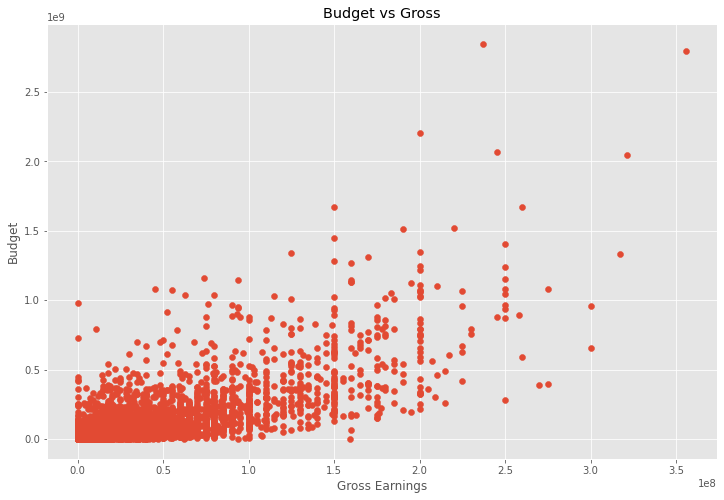

In [9]:
# Search for corallations with 'gross' column
#Scatter plot - Budget vs Gross

plt.scatter(x=df['budget'],y=df['gross'])
plt.title('Budget vs Gross')
plt.xlabel('Gross Earnings')
plt.ylabel('Budget')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

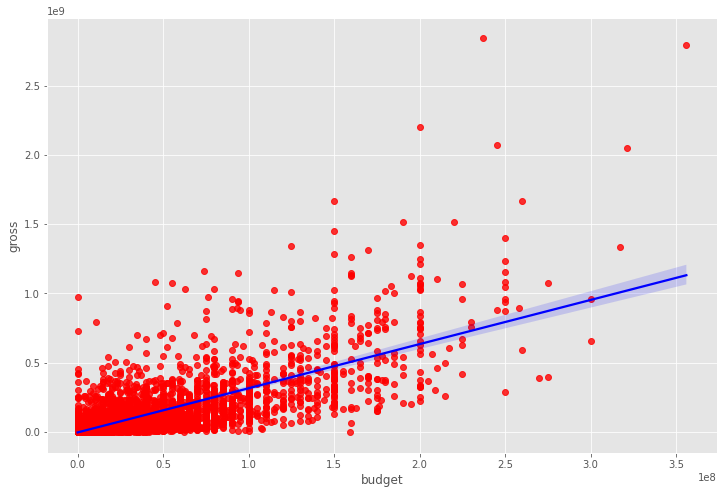

In [10]:
#Plot Budget vs Gross using seaborn

sns.regplot(x='budget',y='gross',data=df, scatter_kws={"color":"red"}, line_kws={"color":"blue"})

In [13]:
#All df correlation (Using pearson method)
df.corr()
#High correlation between budget and gross

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.309212,0.261900,0.120811
score,0.097995,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.222945,0.409182,1.000000,0.486862,0.632834,0.309212
budget,0.309212,0.055665,0.486862,1.000000,0.750157,0.269510
gross,0.261900,0.186392,0.632834,0.750157,1.000000,0.245235
runtime,0.120811,0.399451,0.309212,0.269510,0.245235,1.000000


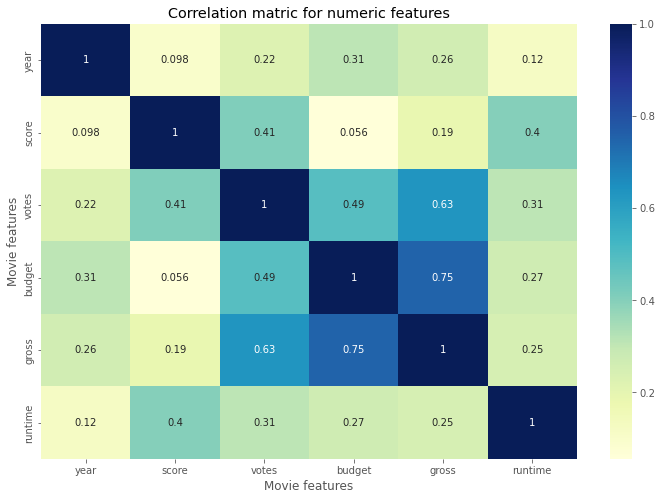

In [11]:
#Visualization of df.corr() correlation
correlation_matrix=df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.title('Correlation matric for numeric features')
plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.show()

In [30]:
df.head()

,name,rating,genre,year,Origin,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,United States,"June 13, 1980",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,United States,"July 2, 1980",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,United States,"June 20, 1980",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,United States,"July 2, 1980",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,United States,"July 25, 1980",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [13]:
#Change object into numeric values
df_numerized = df

for col_name in df_numerized.columns:
    if(df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name]= df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized

,name,rating,genre,year,Origin,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,6587,6,6,1980,57,1510,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0,0
1,5573,6,1,1980,57,1311,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0,0
2,5142,4,0,1980,57,1568,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0,0
3,286,4,4,1980,57,1311,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0,0
4,1027,6,4,1980,57,1360,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,3705,-1,6,2020,57,2582,3.1,18.0,1500,2289,2421,55,7000.0,0.0,-1,90.0,40
7664,1678,-1,4,2020,57,975,4.7,36.0,774,2614,1886,55,0.0,0.0,539,90.0,40
7665,4717,-1,6,2020,9,162,5.7,29.0,2061,2683,2040,55,58750.0,0.0,941,NaN,40
7666,2843,-1,6,2020,57,2462,NaN,NaN,1184,1824,450,55,15000.0,0.0,-1,120.0,40


In [42]:
df

,name,rating,genre,year,Origin,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,United States,"June 13, 1980",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,United States,"July 2, 1980",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,United States,"June 20, 1980",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,United States,"July 2, 1980",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,United States,"July 25, 1980",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,United States,"October 23, 2020",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000,0,NaN,90.0,2020
7664,Dream Round,NaN,Comedy,2020,United States,"February 7, 2020",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0,0,Cactus Blue Entertainment,90.0,2020
7665,Saving Mbango,NaN,Drama,2020,Cameroon,"April 27, 2020",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750,0,Embi Productions,NaN,2020
7666,It's Just Us,NaN,Drama,2020,United States,"October 1, 2020",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000,0,NaN,120.0,2020


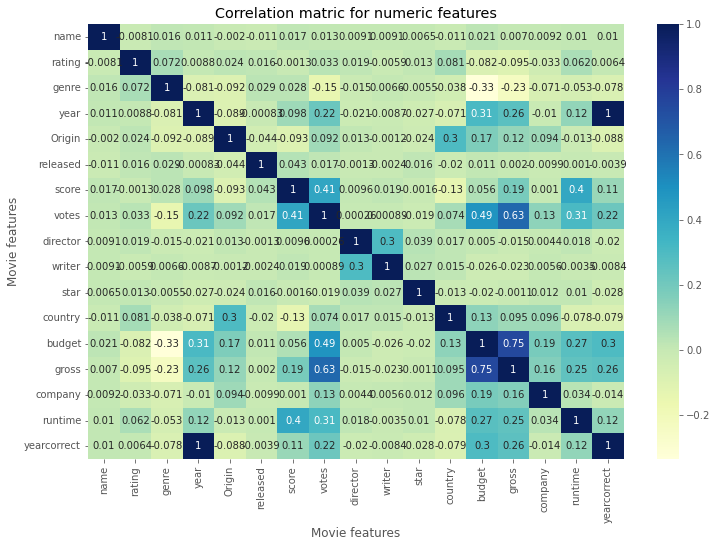

In [43]:
#Visualization of df_numerized.corr() 
correlation_matrix=df_numerized.corr()
sns.heatmap(correlation_matrix, annot=True, cmap="YlGnBu")
plt.title('Correlation matric for numeric features')
plt.xlabel('Movie features')
plt.ylabel('Movie features')
plt.show()

In [14]:
#unstack the correlation matrics of df_numerized

correlation_mat = df_numerized.corr()

corr_pairs = correlation_mat.unstack()

corr_pairs.sort_values()

corr_pairs

name         name           1.000000
             rating        -0.008069
             genre          0.016355
             year           0.011453
             Origin        -0.001968
                              ...   
yearcorrect  budget         0.300236
             gross          0.255130
             company       -0.014144
             runtime        0.120636
             yearcorrect    1.000000
Length: 289, dtype: float64

In [15]:
# find high correlated pairs

high_corr = corr_pairs[(corr_pairs)>0.5]
high_corr

name         name           1.000000
rating       rating         1.000000
genre        genre          1.000000
year         year           1.000000
             yearcorrect    0.996397
Origin       Origin         1.000000
released     released       1.000000
score        score          1.000000
votes        votes          1.000000
             gross          0.632834
director     director       1.000000
writer       writer         1.000000
star         star           1.000000
country      country        1.000000
budget       budget         1.000000
             gross          0.750157
gross        votes          0.632834
             budget         0.750157
             gross          1.000000
company      company        1.000000
runtime      runtime        1.000000
yearcorrect  year           0.996397
             yearcorrect    1.000000
dtype: float64

In [ ]:
#Conclusions:
#Votes and budget has the highest correlation to gross earnings
#Company has low correlation to gross earnings